<a href="https://colab.research.google.com/github/JAYACHITRA2199/DATA-ANALSIS-AND-ML-PROJECTS-/blob/PYTHON-FILES/brain_stroke_prediction_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv


# LOADING DATA AND EDA

In [ ]:
df = pd.read_csv('/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# VISUALIZATION

* CATEGORICAL VISUALIZATION

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:xlabel='stroke', ylabel='count'>

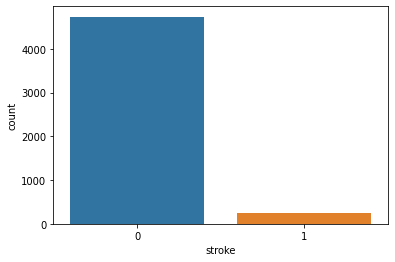

In [ ]:
sns.countplot(x='stroke', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

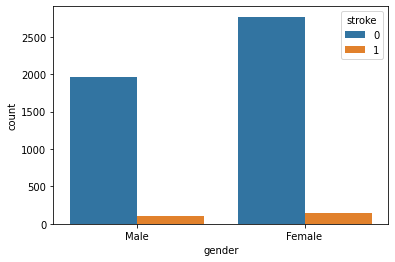

In [ ]:
sns.countplot(x='gender', data=df, hue='stroke')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

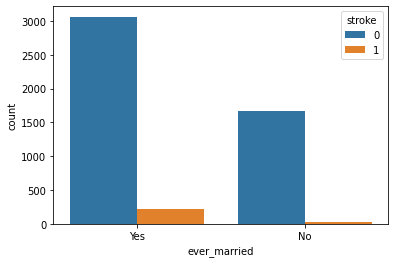

In [ ]:
sns.countplot(x='ever_married', data=df, hue='stroke')

In [ ]:
df['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

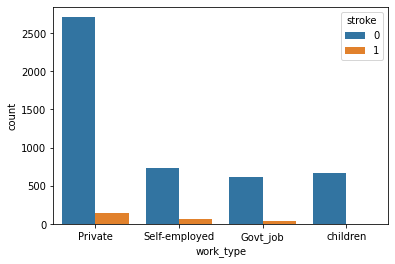

In [ ]:
sns.countplot(x='work_type', data=df, hue='stroke')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

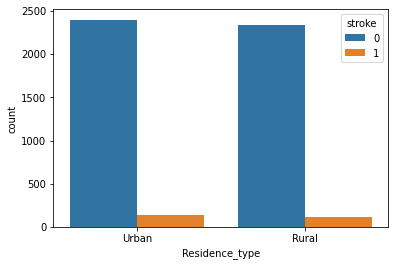

In [ ]:
sns.countplot(x='Residence_type', data=df, hue='stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

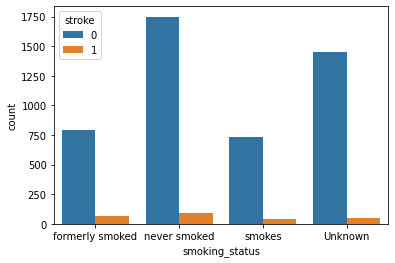

In [ ]:
sns.countplot(x='smoking_status', data=df, hue='stroke')

* NUMERICAL VISUALIZATION

<AxesSubplot:>

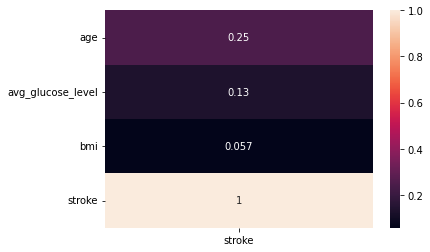

In [ ]:
sns.heatmap(df.drop(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status'], axis=1).corr()[['stroke']], annot=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

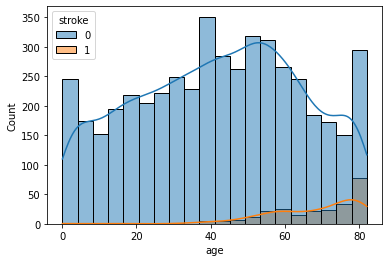

In [ ]:
sns.histplot(x='age', data=df, hue='stroke', kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

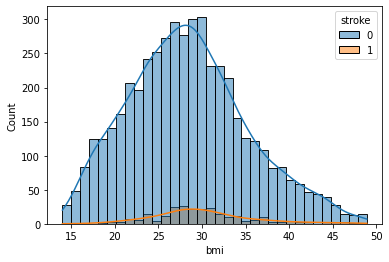

In [ ]:
sns.histplot(x='bmi', data=df, hue='stroke', kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

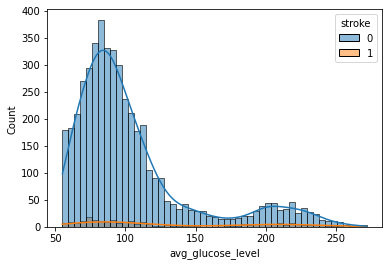

In [ ]:
sns.histplot(x='avg_glucose_level', data=df, hue='stroke', kde=True)

# DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']]
X_num = df.drop(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis=1)

In [ ]:
X_cat = pd.get_dummies(X_cat)

In [ ]:
X_cat.head()

,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [ ]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y=df['stroke']

In [ ]:
X.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.040584,2.723411,1.193238,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,1.614270,-0.000523,0.589390,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0.246250,1.448529,0.869222,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1.570141,1.512650,-0.662492,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,1.658400,1.780895,0.073909,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0


# MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1418
           1       0.08      0.01      0.02        77

    accuracy                           0.94      1495
   macro avg       0.52      0.50      0.50      1495
weighted avg       0.90      0.94      0.92      1495



# MODEL FEATURE IMPORTANCES

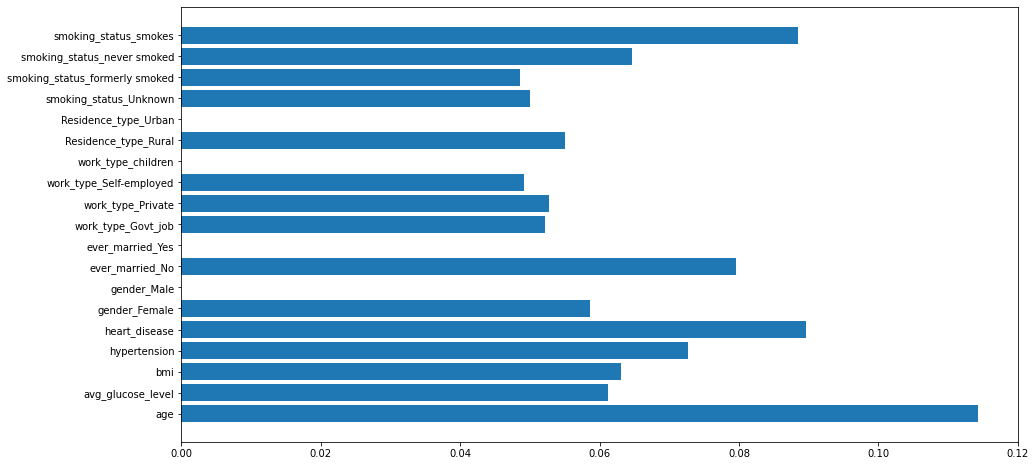

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.barh(X.columns, model_xgb.feature_importances_)
plt.show()